In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 * Part 1: Data Exploration and Preprocessing

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

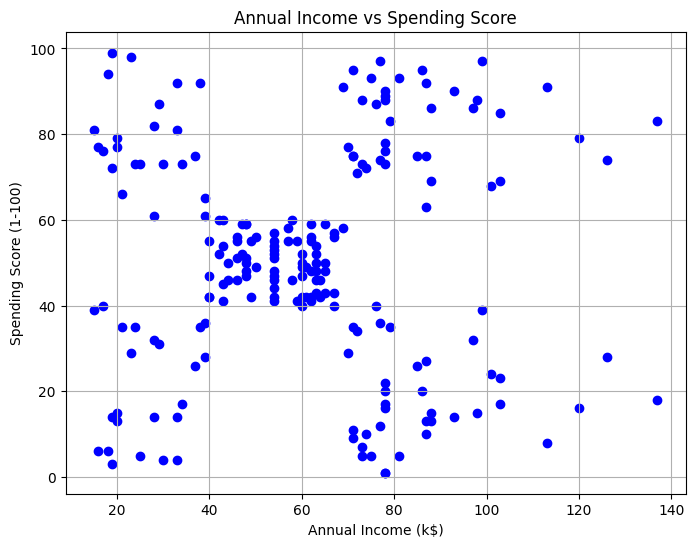

In [80]:
# 1. Load the Data
df = pd.read_csv("/content/Mall_Customers.csv")

# 2. Explore the Dataset
print(df.head())
print(df.info())
print(df.describe())

# 3. Data Selection: Focus on 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

# 4. Initial Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c='blue')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


* Part 2: K-Means Clustering

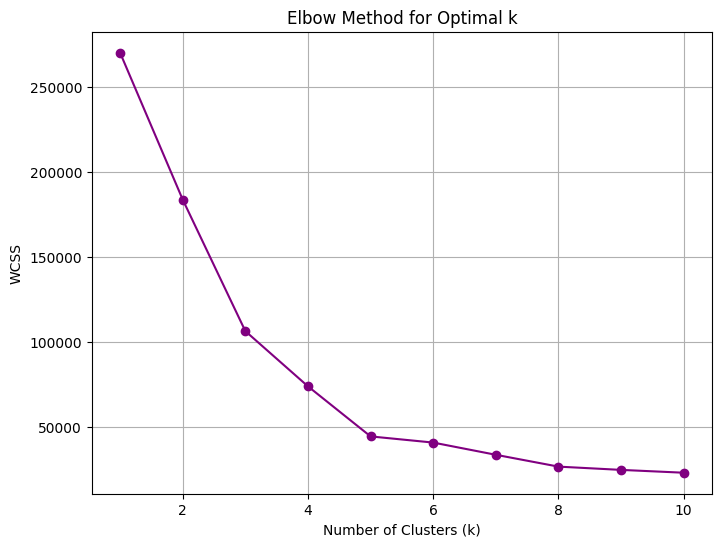

In [81]:
from sklearn.cluster import KMeans

# 1. Elbow Method to Find Optimal k
wcss = []  # Within-Cluster Sum of Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='purple')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Here we took Optimal k = 5 because it is the point were after dropping, flattening is started.

In [82]:
# 2. Apply K-Means
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

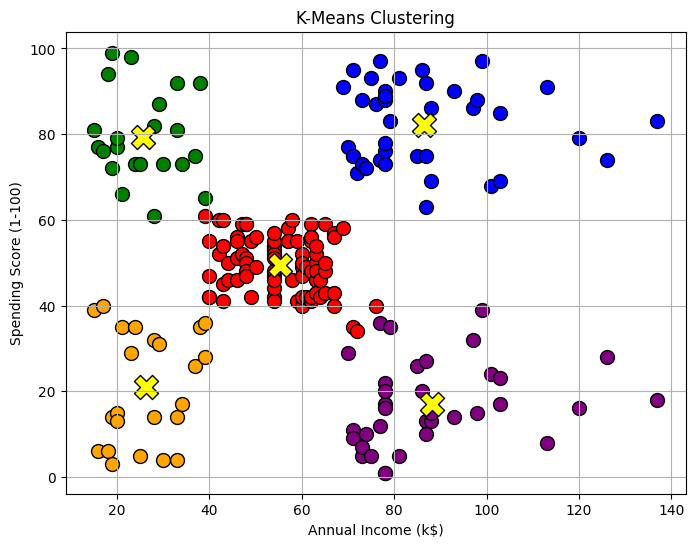

In [83]:
# 3. Visualize Clusters and Centroids
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(optimal_k):
    plt.scatter(X[y_kmeans == i]['Annual Income (k$)'],
                X[y_kmeans == i]['Spending Score (1-100)'],
                s=100, c=colors[i], label=f'Cluster {i+1}', edgecolor='k')

# Plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='X', edgecolor='black')

plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


Part 3: Agglomerative Hierarchical Clustering

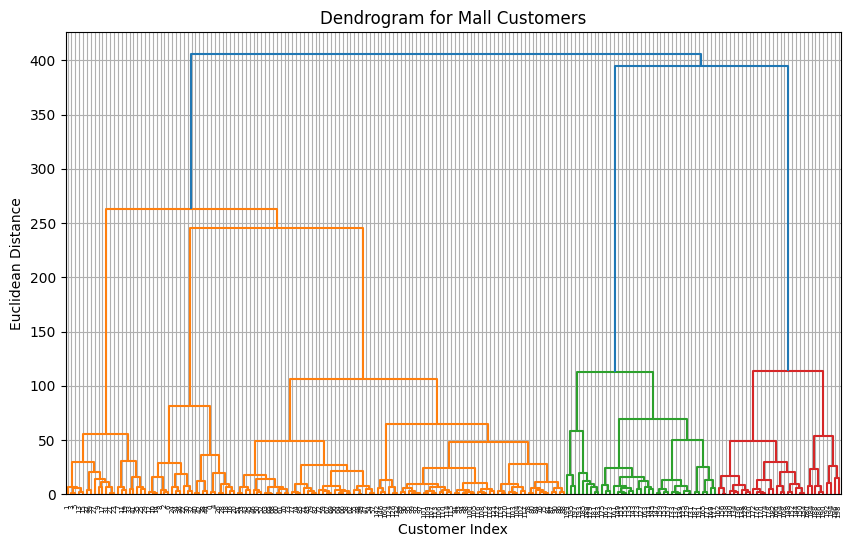

In [84]:
#1.  Creating a Dendrogram:
import scipy.cluster.hierarchy as sch

#linkage matrix
linkage_matrix = sch.linkage(X, method='ward')

# Plot of dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram for Mall Customers')
plt.xlabel('Customer Index')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()


In [85]:
# 2.  Applying Hierarchical Clustering:
'''from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)'''

"from sklearn.cluster import AgglomerativeClustering\nhc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')\ny_hc = hc.fit_predict(X)"

In [86]:
# Plot of clusters
'''plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green']

for i in range(3):
    plt.scatter(X[y_hc == i]['Annual Income (k$)'],
                X[y_hc == i]['Spending Score (1-100)'],
                s=100, c=colors[i], edgecolor='k')

plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()'''

"plt.figure(figsize=(8, 6))\ncolors = ['red', 'blue', 'green']\n\nfor i in range(3):\n    plt.scatter(X[y_hc == i]['Annual Income (k$)'],\n                X[y_hc == i]['Spending Score (1-100)'],\n                s=100, c=colors[i], edgecolor='k')\n\nplt.title('Agglomerative Hierarchical Clustering')\nplt.xlabel('Annual Income (k$)')\nplt.ylabel('Spending Score (1-100)')\nplt.grid(True)\nplt.show()"

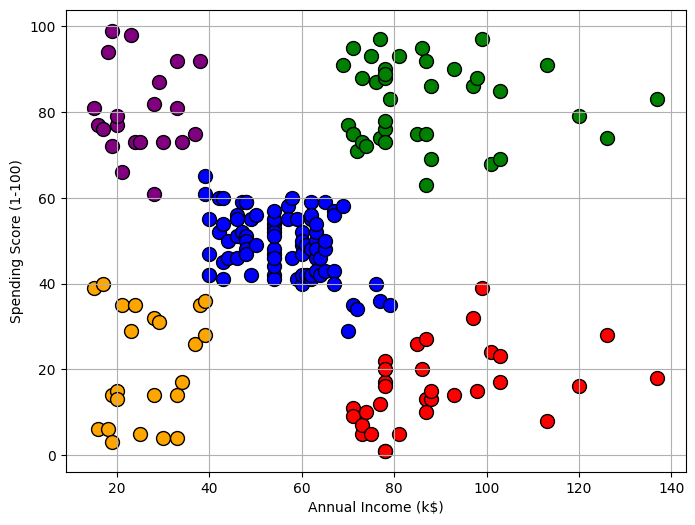

In [87]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
plt.figure(figsize=(8, 6))

colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(5):
    plt.scatter(X[y_hc == i]['Annual Income (k$)'],
                X[y_hc == i]['Spending Score (1-100)'],
                s=100, c=colors[i], edgecolor='k')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

* Part 4: DBSCAN Clustering

In [88]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)


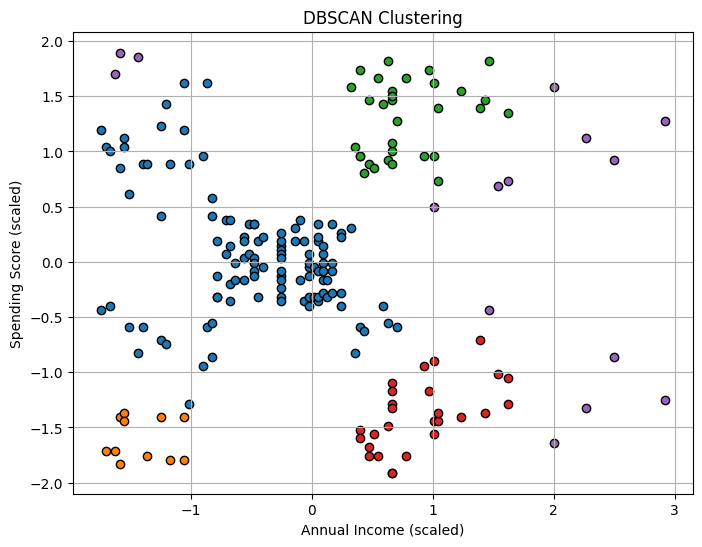

In [89]:
plt.figure(figsize=(8, 6))

for label in set(labels):
    if label == -1:
        color = 'purple'
    else:
        color = None


    plt.scatter(X_scaled[labels == label, 0],
                X_scaled[labels == label, 1],
                edgecolor='k')

plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.grid(True)
plt.show()